In [8]:
import os
import numpy as np
import matplotlib.image as mpimg
from utils import*

# Define the root directory containing the training data
root_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/augmented/"
image_dir = os.path.join(root_dir, "images")
gt_dir = os.path.join(root_dir, "groundtruth")

# List all image and ground truth files
image_files = sorted(os.listdir(image_dir))
gt_files = sorted(os.listdir(gt_dir))

# Example of processing all images
all_patches_img = []
all_patches_gt = []

for i, (img_file, gt_file) in enumerate(zip(image_files, gt_files)):
    # Load image and ground truth
    img = load_image(os.path.join(image_dir, img_file))    # Should be 400x400x3
    gt = load_image(os.path.join(gt_dir, gt_file))         # Should be 400x400, single channel

    # Normalize image
    img = normalize_image(img)

    gt = (gt > 0.5).astype(np.float32)

    # Extract 256x256 patches
    patches_img, patches_gt = extract_patches(img, gt, patch_size=256)

    # Store them
    all_patches_img.extend(patches_img)
    all_patches_gt.extend(patches_gt)

# At this point, all_patches_img and all_patches_gt contain the preprocessed patches
# which can then be saved, or used directly for training a U-Net model.

In [9]:
# Define output directories for the patches
# Change these paths to desired locations
patch_image_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/patches/images"
patch_gt_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/patches/groundtruth"

# Create the directories if they do not exist
os.makedirs(patch_image_dir, exist_ok=True)
os.makedirs(patch_gt_dir, exist_ok=True)

# Iterate over all extracted patches
for idx, (img_patch, gt_patch) in enumerate(zip(all_patches_img, all_patches_gt)):
    # Convert the normalized image patch (float in [0,1]) to uint8 [0,255] for saving
    img_patch_uint8 = (img_patch * 255).astype(np.uint8)
    
    # Ground truth patch is binary (0 or 1), also convert to uint8 [0,255]
    gt_patch_uint8 = (gt_patch * 255).astype(np.uint8)
    
    # Save the image patch as PNG
    Image.fromarray(img_patch_uint8).save(os.path.join(patch_image_dir, f"patch_{idx}.png"))
    
    # Save the ground truth patch as PNG (single channel)
    Image.fromarray(gt_patch_uint8).save(os.path.join(patch_gt_dir, f"mask_{idx}.png"))

print("Patches and masks have been saved successfully!")

Patches and masks have been saved successfully!


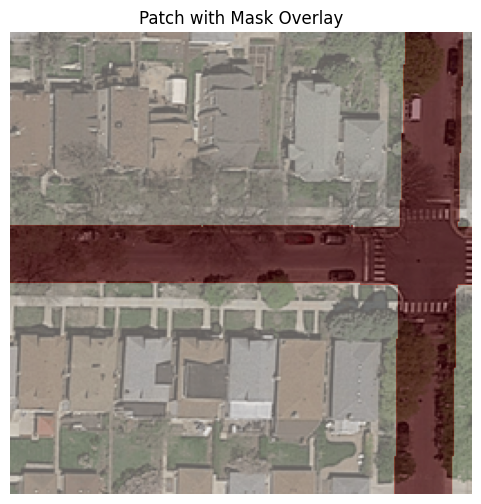

In [10]:
# Example paths to a single patch and its corresponding mask
# Update these with actual patch and mask file paths
patch_file = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/patches/images/patch_1356.png"
mask_file = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/patches/groundtruth/mask_1356.png"

# Load the patch and its mask
patch_img = mpimg.imread(patch_file)
mask_img = mpimg.imread(mask_file)

# Create a figure to visualize the patch and overlay the mask
fig, ax = plt.subplots(figsize=(6,6))

# Display the patch image
ax.imshow(patch_img)

# Overlay the mask on top of the patch image.
# Use a colormap (e.g., 'Reds') and alpha transparency for the mask.
ax.imshow(mask_img, cmap='Reds', alpha=0.4)

# Remove axes for a cleaner figure (optional)
ax.axis('off')
ax.set_title("Patch with Mask Overlay")

# Show the figure interactively (you can comment this out if running in a non-interactive environment)
plt.show()

In [11]:
# Example usage
directory_path = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/patches/groundtruth/"
dimensions_summary = check_image_dimensions(directory_path)
summarize_dimensions(dimensions_summary)

Image Dimensions Summary:
Dimension: (256, 256), Count: 2400



Original Image Shape: (608, 608, 3)
Number of Patches: 9


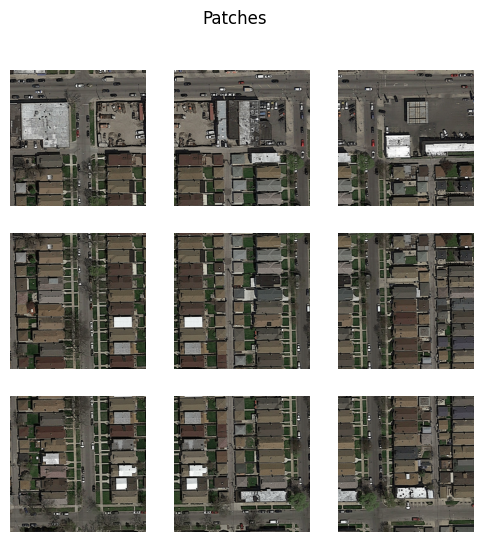

Predicted Patch Shape: (256, 256, 3)


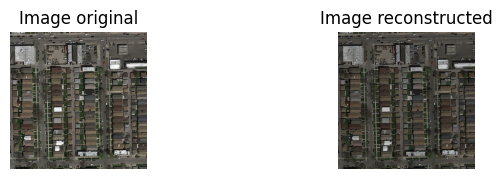

In [13]:
image = plt.imread("/Users/aurelien/ML/ML_course-main/projects/project2/data/test_set_images/test_1/test_1.png")[:608, :608, :]
print(f"Original Image Shape: {image.shape}")

if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)

patches, coords = extract_patches_from_large_image(image, patch_size=256)
print(f"Number of Patches: {len(patches)}")

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
for i, patch in enumerate(patches):
    ax = axs[i // 3, i % 3]
    ax.imshow(patch.astype(np.uint8))
    ax.axis("off")
plt.suptitle("Patches")
plt.show()

predicted_patches = [patch * 0.8 for patch in patches]
print(f"Predicted Patch Shape: {predicted_patches[0].shape}")

reconstructed_image = reconstruct_image_from_patches(predicted_patches, coords, image.shape, patch_size=256)

reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 2))
plt.subplot(1, 3, 1)
plt.title("Image original")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Image reconstructed")
plt.imshow(reconstructed_image)
plt.axis("off")
plt.show()